<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [2]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip')
df = pd.read_csv(zf.open(zipfile.ZipFile.namelist(zf)[0]))

In [57]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7UlL._SS40_.jpg,https://www.upccodesearch.com/images/barcode/0841710106442.png,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51DfBuqy4qL._SL1189_.jpg,https://images-na.ssl-images-amazon.com/images/I/51TshsEJTIL.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%25252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51g3uIwzOIL._SL1050_.jpg,http://ecx.images-amazon.com/images/I/613LUdOc1eL._SS40_.jpg","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,0841710106442,841710106442,amazonbasicsaaaperformancealkalinebatteries36count/b00qwo9p0o",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9P0O/,I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.,... 3 of them and one of the item is bad quality. Is missing backup spring so I have ...,Byger yang,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO/,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-36-Pack/dp/B00LH3DMUO/,http://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-36-Pack/dp/B00LH3DMUO"
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7UlL._SS40_.jpg,https://www.upccodesearch.com/images/barcode/0841710106442.png,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51DfBuqy4qL._SL1189_.jpg,https://images-na.ssl-images-amazon.com/images/I/51TshsEJTIL.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%25252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51g3uIwzOIL._SL1050_.jpg,http://ecx.images-amazon.com/images/I/613LUdOc1eL._SS40_.jpg","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,0841710106442,841710106442,amazonbasicsaaaperformancealkalinebatteries36count/b00qwo9p0o",...,NaN,NaN,NaN,NaN,4,https://www.amazon.c

In [58]:
df.shape

(28332, 24)

In [3]:
# Start small for compute time
df = df.sample(10000)
df.shape

(10000, 24)

In [4]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

# Clean Data

In [5]:
df = df[['name', 'primaryCategories', 'reviews.rating', 'reviews.text', 'reviews.title']]

In [6]:
df.head()

,name,primaryCategories,reviews.rating,reviews.text,reviews.title
8537,AmazonBasics AA Performance Alkaline Batteries...,Health & Beauty,1,These batteries are bad. In any device the las...,Bad lot of batteries
5042,AmazonBasics AAA Performance Alkaline Batterie...,Health & Beauty,5,These batteries are great and affordable! High...,Great batteries at a great price!
23280,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Electronics,5,Bought for my son for Easter. He loves it and ...,Great for kids
5161,AmazonBasics AAA Performance Alkaline Batterie...,Health & Beauty,5,Great batteries. They are highly comparable to...,Great batteries. They are highly comparable to...
13904,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Electronics,4,Easy to use tablet. Price is pretty good. My m...,Easy to use


In [7]:
pd.set_option('display.max_colwidth', None)
df[['name', 'reviews.rating', 'reviews.text']].head(10)

,name,reviews.rating,reviews.text
8537,AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary,1,These batteries are bad. In any device the last only a very short time.
5042,AmazonBasics AAA Performance Alkaline Batteries (36 Count),5,These batteries are great and affordable! Highly recommend!
23280,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",5,Bought for my son for Easter. He loves it and easy for him to use. great for different apps for learning.
5161,AmazonBasics AAA Performance Alkaline Batteries (36 Count),5,Great batteries. They are highly comparable to most top name brands out there. Recently I have only been buying AmazonBasics. They work just fine.
13904,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black",4,Easy to use tablet. Price is pretty good. My mom loves it.
15383,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case",5,"I purchased this for my youngest grandson, age 4 for christmas and he will be receiving it shortly. Games have been downloaded and it will be charged and ready to use when he opens his gift."
12204,Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,5,"Replacement charger for my son's Kindle, works great, highly recommended."
26860,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers",4,I bought this for my dad in his late 60s mainly to listen to music and read ebooks borrowed from the library. I set it up for him and he loves it. I just don't like that it has ads on the start up unless you pay to get rid of them.
16779,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta",5,Not only did my daughter in law love it I was able to experience convenience of having it shipped!
6941,AmazonBasics AAA Performance Alkaline Batteries (36 Count),5,"I am not a bettery expert nor an electrician. There are a few things that I consider when shopping for a battery - shelf life, price and brand. When you buy a brand product, you are most certainly guaranteed a good long lasting battery. Hence I always bought energizer or Duracell. Amazon is also a big brand so I decided to give it a try and to be honest with you it's a great battery. Price wise, it's cheaper than other name brands. One other andvreallyninportant factor is the shelf life. This battery has a shelf life of ten years, while a lot of batteries have 5 year shelf life. This is important for someone who uses batteries on a less frequent basis, such as for remote control. I started using batteries more frequently since I have a ton of baby toys now and a lot of them require batteries.One thought that came to mind while I was writing this review is that I just wanted to share a quick and easy way to check if battery is dead or not. All you need to do is hold the battery over flat surface (let's say kitchen countertop) at one or so inches high and drop it vertically on the flatter side. If it drops and falls over it is dead. If it falls and stays vertical it is still good to go. A friend of mine told me this trick and it totally works!"


# Tokenization

In [8]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [9]:
# Using Lemmas as tokens

tokens = []

for doc in nlp.pipe(df['reviews.text']):
    
    doc_tokens = []
    
    for token in doc:
        if ((token.is_stop != True) and (token.pos_ != "PRON")) and (token.is_punct != True):
            doc_tokens.append(token.lemma_.strip())
            
    tokens.append(doc_tokens)

In [10]:
len(tokens) == df.shape[0]

True

In [11]:
tokens[0]

['battery', 'bad', 'device', 'short', 'time']

# Gensim LDA Topic Modeling

In [12]:
import gensim

from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [13]:
id2word = corpora.Dictionary(tokens) # A list of list of tokens

In [15]:
len(id2word.keys())

6358

In [16]:
id2word.filter_extremes(no_below=5, no_above=.95)

In [17]:
len(id2word.keys())

1764

In [18]:
corpora = [id2word.doc2bow(doc) for doc in tokens]

In [19]:
corpora[5]

[(16, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1)]

In [20]:
lda = LdaMulticore(corpus=corpora,
                  id2word=id2word,
                  num_topics=15,
                  passes=50)

In [21]:
lda.print_topics()

[(0,
  '0.057*"light" + 0.053*"read" + 0.039*"money" + 0.033*"kindle" + 0.032*"love" + 0.030*"amazon" + 0.028*"buy" + 0.021*"worth" + 0.018*"spend" + 0.016*"book"'),
 (1,
  '0.080*"game" + 0.060*"app" + 0.059*"play" + 0.052*"tablet" + 0.032*"kid" + 0.027*"download" + 0.027*"watch" + 0.023*"great" + 0.022*"video" + 0.022*"love"'),
 (2,
  '0.109*"tablet" + 0.030*"Amazon" + 0.022*"nice" + 0.020*"iPad" + 0.018*"fire" + 0.016*"Fire" + 0.015*"work" + 0.013*"price" + 0.013*"well" + 0.012*"kid"'),
 (3,
  '0.077*"easy" + 0.077*"use" + 0.053*"read" + 0.051*"book" + 0.026*"tablet" + 0.024*"love" + 0.022*"great" + 0.021*"size" + 0.017*"screen" + 0.016*"Kindle"'),
 (4,
  '0.267*"great" + 0.143*"work" + 0.120*"price" + 0.054*"product" + 0.044*"battery" + 0.025*"excellent" + 0.025*"buy" + 0.025*"value" + 0.023*"recommend" + 0.022*"good"'),
 (5,
  '0.064*"need" + 0.060*"purchase" + 0.047*"perfect" + 0.043*"gift" + 0.040*"thank" + 0.038*"happy" + 0.031*"ok" + 0.028*"item" + 0.026*"give" + 0.025*"produc

In [22]:
import re
words = [re.findall('"([^"]*)"', t[1]) for t in lda.print_topics()]

In [23]:
words[:2]

[['light',
  'read',
  'money',
  'kindle',
  'love',
  'amazon',
  'buy',
  'worth',
  'spend',
  'book'],
 ['game',
  'app',
  'play',
  'tablet',
  'kid',
  'download',
  'watch',
  'great',
  'video',
  'love']]

In [24]:
topics = [' '.join(t[0:5]) for t in words]

In [25]:
for id, t in enumerate(topics):
    print(f"----- Topic {id} -----")
    print(t, end="\n\n")

----- Topic 0 -----
light read money kindle love

----- Topic 1 -----
game app play tablet kid

----- Topic 2 -----
tablet Amazon nice iPad fire

----- Topic 3 -----
easy use read book tablet

----- Topic 4 -----
great work price product battery

----- Topic 5 -----
need purchase perfect gift thank

----- Topic 6 -----
like Kindle reader screen device

----- Topic 7 -----
battery work buy use week

----- Topic 8 -----
good price battery deal quality

----- Topic 9 -----
battery Amazon brand buy box

----- Topic 10 -----
long battery time brand great

----- Topic 11 -----
Amazon tablet sound screen good

----- Topic 12 -----
love buy tablet Kindle get

----- Topic 13 -----
kid tablet love easy use

----- Topic 14 -----
year old love buy 3



# Interpret LDA Results

In [26]:
# Topic Distance Visualization
"""
Tells us if the topics are distinct, and what terms are most important to the topic distribution.
"""

import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [82]:
pyLDAvis.gensim.prepare(lda, corpora, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.208281  0.120096       1        1  14.929305
4      0.184222 -0.124650       2        1   8.774385
7      0.096671  0.049978       3        1   7.618730
14     0.161631 -0.124314       4        1   7.253582
10    -0.095776  0.245154       5        1   7.009941
11     0.170621  0.024126       6        1   6.970578
8      0.134559 -0.115502       7        1   6.280695
12    -0.245939 -0.065798       8        1   5.895720
3      0.158100  0.006036       9        1   5.885820
5     -0.219329 -0.263233      10        1   5.750961
6      0.031483  0.082588      11        1   5.448373
9      0.046901  0.160243      12        1   5.237621
0     -0.027160  0.009492      13        1   4.955624
1     -0.142843 -0.134978      14        1   4.323172
13    -0.044862  0.130760      15        1   3.665495, topic_info=        Term         Freq        Total Category  logprob  loglift
20     great  3162.000000  3162.000000  Default  30.0000  30.0000
124  battery  3355.000000  3355.000000  Default  29.0000  29.0000
32      good  2363.000000  2363.000000  Default  28.0000  28.0000
0       easy  1160.000000  1160.000000  Default  27.0000  27.0000
33     price  1849.000000  1849.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
136      new    28.516663   383.386292  Topic15  -4.9368   0.7077
177    happy    27.684774   307.539093  Topic15  -4.9664   0.8985
447   little    26.921400   359.978546  Topic15  -4.9944   0.7131
126     time    27.141638   913.450134  Topic15  -4.9862  -0.2100
7        use    26.217224  1687.582275  Topic15  -5.0209  -0.8584

[997 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
171       3  0.864994      $
171       4  0.047304      $
171       7  0.020273      $
171      11  0.060820      $
229       3  0.021095      1
...     ...       ...    ...
28        6  0.908729   year
711       2  0.988357  young
188       6  0.984271     yr
1179     15  0.789749    yup
894      15  0.931216   zero

[2192 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 8, 15, 11, 12, 9, 13, 4, 6, 7, 10, 1, 2, 14])

In [27]:
# What are the documents about?
# Eqv. to a .predict statement in sklearn
# Scoring the topic distribution of a single document

lda[corpora[0]]

[(0, 0.011111299),
 (1, 0.01111131),
 (2, 0.011111305),
 (3, 0.011111308),
 (4, 0.011111304),
 (5, 0.011111304),
 (6, 0.01111132),
 (7, 0.8444416),
 (8, 0.011111302),
 (9, 0.011111316),
 (10, 0.011111406),
 (11, 0.011111315),
 (12, 0.011111299),
 (13, 0.011111323),
 (14, 0.0111113135)]

In [28]:
distro = [lda[d] for d in corpora]

In [29]:
def update(doc):
    d_dist = {k:0 for k in range(0,15)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(d) for d in distro]

In [30]:
doc_topics = pd.DataFrame.from_records(new_distro)
doc_topics.columns = topics

In [31]:
doc_topics.head()

,light read money kindle love,game app play tablet kid,tablet Amazon nice iPad fire,easy use read book tablet,great work price product battery,need purchase perfect gift thank,like Kindle reader screen device,battery work buy use week,good price battery deal quality,battery Amazon brand buy box,long battery time brand great,Amazon tablet sound screen good,love buy tablet Kindle get,kid tablet love easy use,year old love buy 3
0,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.844442,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111
1,0.011111,0.011111,0.011111,0.011111,0.541189,0.011111,0.011111,0.011111,0.011111,0.011111,0.314363,0.011111,0.011111,0.011111,0.011111
2,0.000000,0.485360,0.000000,0.221971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.212667,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.582165,0.000000,0.000000,0.000000,0.000000,0.339041,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.552006,0.000000,0.000000,0.000000,0.000000,0.351696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
doc_topics['primary_topic'] = doc_topics.idxmax(axis=1)

In [33]:
doc_topics['primary_topic'].value_counts()

great work price product battery    1254
good price battery deal quality      967
love buy tablet Kindle get           884
easy use read book tablet            857
battery Amazon brand buy box         811
kid tablet love easy use             788
battery work buy use week            772
game app play tablet kid             649
long battery time brand great        545
year old love buy 3                  531
Amazon tablet sound screen good      525
tablet Amazon nice iPad fire         488
like Kindle reader screen device     375
need purchase perfect gift thank     301
light read money kindle love         253
Name: primary_topic, dtype: int64

# Selecting the Number of Topics

In [34]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute u_mass coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=12)
            coherencemodel = CoherenceModel(model=model, dictionary=dictionary, corpus=corpus, coherence='u_mass')
            coherence_values.append({"pass": iter_,
                                    "num_topics": num_topics,
                                    "coherence_score": coherencemodel.get_coherence()
                                    })
            
    return coherence_values        

In [35]:
coherence_values = compute_coherence_values(dictionary=id2word,
                                           corpus=corpora,
                                           start=3,
                                           limit=40,
                                           step=2,
                                           passes=1)

In [36]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [37]:
topic_coherence.head()

,pass,num_topics,coherence_score
0,0,3,-2.376442
1,0,5,-2.369452
2,0,7,-2.373709
3,0,9,-2.356680
4,0,11,-2.346559


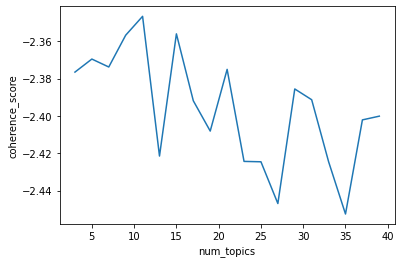

In [38]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

# Let's seperate the data by ratings now

In [54]:
df = pd.read_csv(zf.open(zipfile.ZipFile.namelist(zf)[0]))
df = df[['name', 'primaryCategories', 'reviews.rating', 'reviews.text', 'reviews.title']]
df['reviews.rating'].value_counts()

5    19897
4     5648
3     1206
1      965
2      616
Name: reviews.rating, dtype: int64

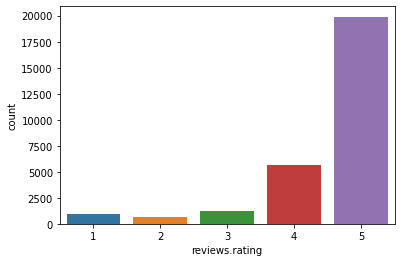

In [55]:
import seaborn as sns

sns.countplot(x="reviews.rating", data=df);

In [56]:
def rating_converter(df, rating, string_rating):
    df = df.replace(rating, string_rating)
    return df

In [57]:
df['reviews.rating'] = rating_converter(df['reviews.rating'], 1, 'bad')

In [58]:
df['reviews.rating'] = rating_converter(df['reviews.rating'], 2, 'bad')

In [59]:
df['reviews.rating'] = rating_converter(df['reviews.rating'], 3, 'bad')

In [60]:
df['reviews.rating'] = rating_converter(df['reviews.rating'], 4, 'good')

In [61]:
df['reviews.rating'] = rating_converter(df['reviews.rating'], 5, 'great')

In [62]:
df['reviews.rating'].value_counts()

great    19897
good      5648
bad       2787
Name: reviews.rating, dtype: int64

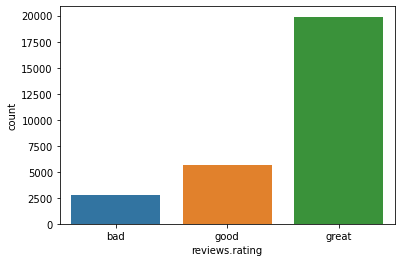

In [63]:
sns.countplot(x="reviews.rating", data=df);

In [64]:
great_percent = df['reviews.rating'].value_counts()[0] / sum(df['reviews.rating'].value_counts()) * 100
good_percent = df['reviews.rating'].value_counts()[1] / sum(df['reviews.rating'].value_counts()) * 100
bad_percent = df['reviews.rating'].value_counts()[2] / sum(df['reviews.rating'].value_counts()) * 100

In [65]:
print(f"A great rating accounts for {great_percent}% of the ratings")
print(f"A good rating accounts for {good_percent}% of the ratings")
print(f"A bad rating accounts for {bad_percent}% of the ratings")
    

A great rating accounts for 70.2280107299167% of the ratings
A good rating accounts for 19.93505576733023% of the ratings
A bad rating accounts for 9.83693350275307% of the ratings


In [69]:
great_ratings = df[df['reviews.rating'] == 'great']
good_ratings = df[df['reviews.rating'] == 'good']
bad_ratings = df[df['reviews.rating'] == 'bad']

In [70]:
great_ratings.head()

,name,primaryCategories,reviews.rating,reviews.text,reviews.title
2,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,great,Well they are not Duracell but for the price i am happy.,... are not Duracell but for the price i am happy.
3,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,great,Seem to work as well as name brand batteries at a much better price,... as well as name brand batteries at a much better
4,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,great,These batteries are very long lasting the price is great.,... batteries are very long lasting the price is great.
5,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,great,Bought a lot of batteries for Christmas and the AmazonBasics Cell have been good. I haven't noticed a difference between the brand name batteries and the Amazon Basic brand. Just a lot easier to purchase and have arrive at the house and have on hand. Will buy again.,... batteries for Christmas and the AmazonBasics Cell have been good. I haven't noticed a difference between the brand ...
6,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,great,ive not had any problame with these batteries have ordered them in the past been very pleased.,... batteries have ordered them in the past been very pleased.


In [71]:
good_ratings.head()

,name,primaryCategories,reviews.rating,reviews.text,reviews.title
1,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,good,Bulk is always the less expensive way to go for products like these,... always the less expensive way to go for products like
9,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,good,AmazonBasics AA AAA batteries have done well by me appear to have a good shelf life. I'll buy them again.,... done well by me appear to have a good shelf life
18,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,good,They don't last as long as the brand name but are good enough considering they are much cheaper.,... last as long as the brand name but are good enough considering they are much cheaper
20,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,good,This my second order and they seem to work as good as name brand and ship to my door.,... my second order and they seem to work as good as name brand and ship to my door
23,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,good,they seemed to not last as long as other name brand names disappointed!,... not last as long as other name brand names disappointed!


In [72]:
bad_ratings.head()

,name,primaryCategories,reviews.rating,reviews.text,reviews.title
0,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,bad,I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.,... 3 of them and one of the item is bad quality. Is missing backup spring so I have ...
8,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,bad,"These do not hold the amount of high power juice like energizer or duracell, but they are half the price.",... do not hold the amount of high power juice like energizer or duracell
11,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,bad,"When I first started getting the Amazon basic batteries I really liked them. With recent purchases, they do not seem to last like they had, or maybe a mixed-bag (inconsistent with some lasting better than others). I have not done any tests, but feel some other brands may last longer. However, the price is hard to beat.",... first started getting the Amazon basic batteries I really liked them. With recent purchases
16,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,bad,I don't know if I would buy thus brand again seems like they don't last as long as Duracell,... know if I would buy thus brand again seems like they don't last as long as Duracell
17,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,bad,"In my opinion these did not last anywhere near as long as Duracel in things like LED candles (which is crazy) and trail cameras. Cameras were not exposed to cold temps more or less than other batteries. WE buy in bulk for the north house. Amazon Basics is great for things like sheets and beeding and towels. In my opinion the battery life, in the large package of aaa and aa size we purchased were lacking.",... last anywhere near as long as Duracel in things like LED candles (which is crazy) and trail cameras


In [73]:
great_tokens = []

for doc in nlp.pipe(great_ratings['reviews.text']):
    
    doc_tokens = []
    
    for token in doc:
        if ((token.is_stop != True) and (token.pos_ != "PRON")) and (token.is_punct != True):
            doc_tokens.append(token.lemma_.strip())
            
    great_tokens.append(doc_tokens)

In [74]:
good_tokens = []

for doc in nlp.pipe(good_ratings['reviews.text']):
    
    doc_tokens = []
    
    for token in doc:
        if ((token.is_stop != True) and (token.pos_ != "PRON")) and (token.is_punct != True):
            doc_tokens.append(token.lemma_.strip())
            
    good_tokens.append(doc_tokens)

In [75]:
bad_tokens = []

for doc in nlp.pipe(bad_ratings['reviews.text']):
    
    doc_tokens = []
    
    for token in doc:
        if ((token.is_stop != True) and (token.pos_ != "PRON")) and (token.is_punct != True):
            doc_tokens.append(token.lemma_.strip())
            
    bad_tokens.append(doc_tokens)

In [78]:
great_tokens[0], good_tokens[0], bad_tokens[0]

(['Duracell', 'price', 'happy'],
 ['bulk', 'expensive', 'way', 'product', 'like'],
 ['order',
  '3',
  'item',
  'bad',
  'quality',
  'miss',
  'backup',
  'spring',
  'pc',
  'aluminum',
  'battery',
  'work'])

In [80]:
import gensim

from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

great_id2word = corpora.Dictionary(great_tokens)
good_id2word = corpora.Dictionary(good_tokens)
bad_id2word = corpora.Dictionary(bad_tokens)

In [81]:
len(great_id2word), len(good_id2word), len(bad_id2word)

(7265, 4358, 3732)

In [82]:
great_id2word.filter_extremes(no_below=5, no_above=.95)
good_id2word.filter_extremes(no_below=5, no_above=.95)
bad_id2word.filter_extremes(no_below=5, no_above=.95)

In [83]:
len(great_id2word), len(good_id2word), len(bad_id2word)

(2360, 1463, 1104)

In [84]:
great_corpora = [great_id2word.doc2bow(doc) for doc in great_tokens]
good_corpora = [good_id2word.doc2bow(doc) for doc in good_tokens]
bad_corpora = [bad_id2word.doc2bow(doc) for doc in bad_tokens]

In [86]:
great_corpora[5], good_corpora[5], bad_corpora[5]

([(3, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)],
 [(9, 2), (11, 1), (24, 1)],
 [(2, 4),
  (7, 1),
  (14, 1),
  (27, 1),
  (34, 1),
  (36, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 2),
  (64, 1),
  (65, 1)])

In [87]:
grea_lda = LdaMulticore(corpus=great_corpora,
                       id2word=great_id2word,
                       num_topics=15,
                       passes=50)

In [88]:
good_lda = LdaMulticore(corpus=good_corpora,
                       id2word=good_id2word,
                        num_topics=15,
                        passes=50)

In [89]:
bad_lda = LdaMulticore(corpus=bad_corpora,
                      id2word=bad_id2word,
                      num_topics=15,
                      passes=50)

In [90]:
grea_lda.print_topics()

[(0,
  '0.082*"kid" + 0.065*"tablet" + 0.055*"game" + 0.049*"love" + 0.038*"great" + 0.032*"play" + 0.024*"watch" + 0.023*"app" + 0.018*"son" + 0.017*"learn"'),
 (1,
  '0.026*"Amazon" + 0.025*"sound" + 0.021*"Alexa" + 0.018*"speaker" + 0.018*"know" + 0.017*"music" + 0.015*"tap" + 0.015*"Echo" + 0.014*"portable" + 0.013*"device"'),
 (2,
  '0.039*"control" + 0.039*"tablet" + 0.036*"child" + 0.030*"app" + 0.029*"parental" + 0.027*"kid" + 0.026*"time" + 0.025*"set" + 0.024*"user" + 0.022*"friendly"'),
 (3,
  '0.170*"great" + 0.161*"good" + 0.127*"price" + 0.097*"battery" + 0.079*"work" + 0.042*"value" + 0.030*"deal" + 0.024*"buy" + 0.023*"quality" + 0.021*"far"'),
 (4,
  '0.117*"love" + 0.107*"year" + 0.104*"old" + 0.062*"buy" + 0.031*"grandson" + 0.028*"Christmas" + 0.028*"tablet" + 0.027*"daughter" + 0.024*"3" + 0.022*"2"'),
 (5,
  '0.113*"love" + 0.098*"buy" + 0.054*"gift" + 0.044*"tablet" + 0.041*"purchase" + 0.034*"son" + 0.029*"happy" + 0.026*"great" + 0.025*"Christmas" + 0.025*"get"

In [91]:
good_lda.print_topics()

[(0,
  '0.088*"love" + 0.058*"tablet" + 0.039*"old" + 0.034*"kid" + 0.034*"easy" + 0.032*"year" + 0.032*"purchase" + 0.027*"use" + 0.026*"buy" + 0.023*"great"'),
 (1,
  '0.043*"great" + 0.040*"old" + 0.038*"buy" + 0.037*"year" + 0.029*"tablet" + 0.019*"use" + 0.018*"Christmas" + 0.017*"love" + 0.016*"card" + 0.015*"grandson"'),
 (2,
  '0.087*"great" + 0.063*"little" + 0.057*"work" + 0.050*"tablet" + 0.029*"app" + 0.018*"expect" + 0.018*"love" + 0.017*"kid" + 0.017*"screen" + 0.015*"product"'),
 (3,
  '0.051*"play" + 0.044*"game" + 0.037*"good" + 0.033*"kid" + 0.028*"tablet" + 0.021*"love" + 0.019*"charge" + 0.019*"great" + 0.016*"work" + 0.013*"get"'),
 (4,
  '0.140*"battery" + 0.029*"long" + 0.025*"life" + 0.021*"brand" + 0.019*"good" + 0.019*"work" + 0.019*"time" + 0.016*"use" + 0.013*"Amazon" + 0.011*"test"'),
 (5,
  '0.077*"tablet" + 0.029*"read" + 0.027*"book" + 0.024*"great" + 0.022*"watch" + 0.022*"internet" + 0.020*"game" + 0.020*"want" + 0.019*"look" + 0.017*"use"'),
 (6,
  '0

In [92]:
bad_lda.print_topics()

[(0,
  '0.064*"tablet" + 0.047*"kid" + 0.037*"good" + 0.026*"great" + 0.021*"game" + 0.018*"app" + 0.017*"child" + 0.012*"use" + 0.011*"think" + 0.011*"friendly"'),
 (1,
  '0.119*"battery" + 0.031*"leak" + 0.022*"remote" + 0.021*"work" + 0.019*"buy" + 0.017*"pack" + 0.016*"day" + 0.013*"2" + 0.013*"go" + 0.012*"get"'),
 (2,
  '0.147*"battery" + 0.067*"long" + 0.034*"brand" + 0.024*"price" + 0.023*"Duracell" + 0.019*"die" + 0.017*"good" + 0.015*"work" + 0.014*"last" + 0.014*"life"'),
 (3,
  '0.102*"battery" + 0.040*"life" + 0.030*"short" + 0.026*"ok" + 0.023*"Amazon" + 0.022*"clock" + 0.021*"mouse" + 0.017*"buy" + 0.017*"week" + 0.016*"purchase"'),
 (4,
  '0.060*"long" + 0.053*"buy" + 0.026*"not" + 0.025*"8" + 0.024*"charge" + 0.023*"tablet" + 0.019*"expect" + 0.019*"get" + 0.018*"good" + 0.018*"hold"'),
 (5,
  '0.051*"charge" + 0.050*"battery" + 0.023*"dead" + 0.021*"device" + 0.019*"Amazon" + 0.019*"buy" + 0.017*"purchase" + 0.017*"problem" + 0.016*"month" + 0.015*"new"'),
 (6,
  '0.0

In [93]:
import re

great_words = [re.findall('"([^"]*)"', t[1]) for t in grea_lda.print_topics()]
good_words = [re.findall('"([^"]*)"', t[1]) for t in good_lda.print_topics()]
bad_words = [re.findall('"([^"]*)"', t[1]) for t in bad_lda.print_topics()]

In [94]:
great_topics = [' '.join(t[0:5]) for t in great_words]
good_topics = [' '.join(t[0:5]) for t in good_words]
bad_topics = [' '.join(t[0:5]) for t in bad_words]

In [95]:
for id, t in enumerate(great_topics):
    print(f"----- Great Topic {id} -----")
    print(t, end="\n\n")  

----- Great Topic 0 -----
kid tablet game love great

----- Great Topic 1 -----
Amazon sound Alexa speaker know

----- Great Topic 2 -----
control tablet child app parental

----- Great Topic 3 -----
great good price battery work

----- Great Topic 4 -----
love year old buy grandson

----- Great Topic 5 -----
love buy gift tablet purchase

----- Great Topic 6 -----
product great recommend price good

----- Great Topic 7 -----
battery long brand work buy

----- Great Topic 8 -----
great tablet size nice perfect

----- Great Topic 9 -----
hold case light Kindle turn

----- Great Topic 10 -----
easy use book read love

----- Great Topic 11 -----
tablet Amazon Fire app great

----- Great Topic 12 -----
battery Amazon good buy try

----- Great Topic 13 -----
battery come box work package

----- Great Topic 14 -----
kindle Kindle love read new



In [96]:
for id, t in enumerate(good_topics):
    print(f"----- Good Topic {id} -----")
    print(t, end="\n\n")

----- Good Topic 0 -----
love tablet old kid easy

----- Good Topic 1 -----
great old buy year tablet

----- Good Topic 2 -----
great little work tablet app

----- Good Topic 3 -----
play game good kid tablet

----- Good Topic 4 -----
battery long life brand good

----- Good Topic 5 -----
tablet read book great watch

----- Good Topic 6 -----
price good great battery work

----- Good Topic 7 -----
tablet great buy good $

----- Good Topic 8 -----
kid great kindle love tablet

----- Good Topic 9 -----
Kindle tablet good screen like

----- Good Topic 10 -----
like app wifi work book

----- Good Topic 11 -----
app tablet Amazon store use

----- Good Topic 12 -----
device app Amazon screen Alexa

----- Good Topic 13 -----
good price tablet product quality

----- Good Topic 14 -----
use easy read book like



In [97]:
for id, t in enumerate(topics):
    print(f"----- Bad Topic {id} -----")
    print(t, end="\n\n")

----- Bad Topic 0 -----
light read money kindle love

----- Bad Topic 1 -----
game app play tablet kid

----- Bad Topic 2 -----
tablet Amazon nice iPad fire

----- Bad Topic 3 -----
easy use read book tablet

----- Bad Topic 4 -----
great work price product battery

----- Bad Topic 5 -----
need purchase perfect gift thank

----- Bad Topic 6 -----
like Kindle reader screen device

----- Bad Topic 7 -----
battery work buy use week

----- Bad Topic 8 -----
good price battery deal quality

----- Bad Topic 9 -----
battery Amazon brand buy box

----- Bad Topic 10 -----
long battery time brand great

----- Bad Topic 11 -----
Amazon tablet sound screen good

----- Bad Topic 12 -----
love buy tablet Kindle get

----- Bad Topic 13 -----
kid tablet love easy use

----- Bad Topic 14 -----
year old love buy 3



## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling